# Data Science project  (bankruptcy-in-poland)   --Imbalanced Data

explore some of the features of the dataset, use visualizations to help us understand those features, and develop a model that solves the problem of imbalanced data by under- and over-sampling.

In [1]:
#import liberaries
import numpy as np
from scipy.io import arff
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from IPython.display import VimeoVideo
from sklearn.impute import SimpleImputer
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier

# Prepare Data




# Import

In [2]:
data=arff.loadarff("./Downloads/3year.arff")

In [3]:
df=pd.DataFrame(data[0])

In [4]:
df.head(5)

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.174190,0.41299,0.14371,1.3480,-28.9820,0.60383,0.219460,1.1225,1.1961,0.46359,...,0.163960,0.375740,0.83604,0.000007,9.7145,6.2813,84.291,4.3303,4.0341,b'0'
1,0.146240,0.46038,0.28230,1.6294,2.5952,0.00000,0.171850,1.1721,1.6018,0.53962,...,0.027516,0.271000,0.90108,0.000000,5.9882,4.1103,102.190,3.5716,5.9500,b'0'
2,0.000595,0.22612,0.48839,3.1599,84.8740,0.19114,0.004572,2.9881,1.0077,0.67566,...,0.007639,0.000881,0.99236,0.000000,6.7742,3.7922,64.846,5.6287,4.4581,b'0'
3,0.024526,0.43236,0.27546,1.7833,-10.1050,0.56944,0.024526,1.3057,1.0509,0.56453,...,0.048398,0.043445,0.95160,0.142980,4.2286,5.0528,98.783,3.6950,3.4844,b'0'
4,0.188290,0.41504,0.34231,1.9279,-58.2740,0.00000,0.233580,1.4094,1.3393,0.58496,...,0.176480,0.321880,0.82635,0.073039,2.5912,7.0756,100.540,3.6303,4.6375,b'0'


In [5]:
df=df.rename_axis("company_id")

In [6]:
df.head(5)

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
company_id,,,,,,,,,,,,,,,,,,,,,
0,0.174190,0.41299,0.14371,1.3480,-28.9820,0.60383,0.219460,1.1225,1.1961,0.46359,...,0.163960,0.375740,0.83604,0.000007,9.7145,6.2813,84.291,4.3303,4.0341,b'0'
1,0.146240,0.46038,0.28230,1.6294,2.5952,0.00000,0.171850,1.1721,1.6018,0.53962,...,0.027516,0.271000,0.90108,0.000000,5.9882,4.1103,102.190,3.5716,5.9500,b'0'
2,0.000595,0.22612,0.48839,3.1599,84.8740,0.19114,0.004572,2.9881,1.0077,0.67566,...,0.007639,0.000881,0.99236,0.000000,6.7742,3.7922,64.846,5.6287,4.4581,b'0'
3,0.024526,0.43236,0.27546,1.7833,-10.1050,0.56944,0.024526,1.3057,1.0509,0.56453,...,0.048398,0.043445,0.95160,0.142980,4.2286,5.0528,98.783,3.6950,3.4844,b'0'
4,0.188290,0.41504,0.34231,1.9279,-58.2740,0.00000,0.233580,1.4094,1.3393,0.58496,...,0.176480,0.321880,0.82635,0.073039,2.5912,7.0756,100.540,3.6303,4.6375,b'0'


In [7]:
df=df.shift()[1:]

In [8]:
df.head(5)

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
company_id,,,,,,,,,,,,,,,,,,,,,
1,0.174190,0.41299,0.14371,1.3480,-28.9820,0.60383,0.219460,1.1225,1.1961,0.46359,...,0.163960,0.375740,0.83604,0.000007,9.7145,6.2813,84.291,4.3303,4.0341,b'0'
2,0.146240,0.46038,0.28230,1.6294,2.5952,0.00000,0.171850,1.1721,1.6018,0.53962,...,0.027516,0.271000,0.90108,0.000000,5.9882,4.1103,102.190,3.5716,5.9500,b'0'
3,0.000595,0.22612,0.48839,3.1599,84.8740,0.19114,0.004572,2.9881,1.0077,0.67566,...,0.007639,0.000881,0.99236,0.000000,6.7742,3.7922,64.846,5.6287,4.4581,b'0'
4,0.024526,0.43236,0.27546,1.7833,-10.1050,0.56944,0.024526,1.3057,1.0509,0.56453,...,0.048398,0.043445,0.95160,0.142980,4.2286,5.0528,98.783,3.6950,3.4844,b'0'
5,0.188290,0.41504,0.34231,1.9279,-58.2740,0.00000,0.233580,1.4094,1.3393,0.58496,...,0.176480,0.321880,0.82635,0.073039,2.5912,7.0756,100.540,3.6303,4.6375,b'0'


In [9]:
df["class"].unique()

array([b'0', b'1'], dtype=object)

Rename class column to bankrupt to be more understable and replace value to be easy in proccecing and predicting

In [10]:
df["bankrupt"] = df["class"].replace([b'0',b'1'],[0,1]).astype(bool)
df.drop(columns="class",inplace=True)

In [11]:
df.head(5)

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,bankrupt
company_id,,,,,,,,,,,,,,,,,,,,,
1,0.174190,0.41299,0.14371,1.3480,-28.9820,0.60383,0.219460,1.1225,1.1961,0.46359,...,0.163960,0.375740,0.83604,0.000007,9.7145,6.2813,84.291,4.3303,4.0341,False
2,0.146240,0.46038,0.28230,1.6294,2.5952,0.00000,0.171850,1.1721,1.6018,0.53962,...,0.027516,0.271000,0.90108,0.000000,5.9882,4.1103,102.190,3.5716,5.9500,False
3,0.000595,0.22612,0.48839,3.1599,84.8740,0.19114,0.004572,2.9881,1.0077,0.67566,...,0.007639,0.000881,0.99236,0.000000,6.7742,3.7922,64.846,5.6287,4.4581,False
4,0.024526,0.43236,0.27546,1.7833,-10.1050,0.56944,0.024526,1.3057,1.0509,0.56453,...,0.048398,0.043445,0.95160,0.142980,4.2286,5.0528,98.783,3.6950,3.4844,False
5,0.188290,0.41504,0.34231,1.9279,-58.2740,0.00000,0.233580,1.4094,1.3393,0.58496,...,0.176480,0.321880,0.82635,0.073039,2.5912,7.0756,100.540,3.6303,4.6375,False


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10502 entries, 1 to 10502
Data columns (total 65 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Attr1     10502 non-null  float64
 1   Attr2     10502 non-null  float64
 2   Attr3     10502 non-null  float64
 3   Attr4     10484 non-null  float64
 4   Attr5     10477 non-null  float64
 5   Attr6     10502 non-null  float64
 6   Attr7     10502 non-null  float64
 7   Attr8     10488 non-null  float64
 8   Attr9     10499 non-null  float64
 9   Attr10    10502 non-null  float64
 10  Attr11    10502 non-null  float64
 11  Attr12    10484 non-null  float64
 12  Attr13    10459 non-null  float64
 13  Attr14    10502 non-null  float64
 14  Attr15    10494 non-null  float64
 15  Attr16    10488 non-null  float64
 16  Attr17    10488 non-null  float64
 17  Attr18    10502 non-null  float64
 18  Attr19    10459 non-null  float64
 19  Attr20    10459 non-null  float64
 20  Attr21    9695 non-null   fl

Rename columns to be same with Data dictionary file

In [13]:
dict={}
c=1
for i in df.columns:
    if i=="bankrupt":
        dict[i]="bankrupt"
    else:
        dict[i]=f"feat_{c}"
    c+=1
        

In [14]:
dict

{'Attr1': 'feat_1',
 'Attr2': 'feat_2',
 'Attr3': 'feat_3',
 'Attr4': 'feat_4',
 'Attr5': 'feat_5',
 'Attr6': 'feat_6',
 'Attr7': 'feat_7',
 'Attr8': 'feat_8',
 'Attr9': 'feat_9',
 'Attr10': 'feat_10',
 'Attr11': 'feat_11',
 'Attr12': 'feat_12',
 'Attr13': 'feat_13',
 'Attr14': 'feat_14',
 'Attr15': 'feat_15',
 'Attr16': 'feat_16',
 'Attr17': 'feat_17',
 'Attr18': 'feat_18',
 'Attr19': 'feat_19',
 'Attr20': 'feat_20',
 'Attr21': 'feat_21',
 'Attr22': 'feat_22',
 'Attr23': 'feat_23',
 'Attr24': 'feat_24',
 'Attr25': 'feat_25',
 'Attr26': 'feat_26',
 'Attr27': 'feat_27',
 'Attr28': 'feat_28',
 'Attr29': 'feat_29',
 'Attr30': 'feat_30',
 'Attr31': 'feat_31',
 'Attr32': 'feat_32',
 'Attr33': 'feat_33',
 'Attr34': 'feat_34',
 'Attr35': 'feat_35',
 'Attr36': 'feat_36',
 'Attr37': 'feat_37',
 'Attr38': 'feat_38',
 'Attr39': 'feat_39',
 'Attr40': 'feat_40',
 'Attr41': 'feat_41',
 'Attr42': 'feat_42',
 'Attr43': 'feat_43',
 'Attr44': 'feat_44',
 'Attr45': 'feat_45',
 'Attr46': 'feat_46',
 'Attr

In [15]:
df.rename(columns=dict, inplace=True)

create wrangle function to repeat same prepration to anothe same data or do another Model statergy

In [16]:
def Wrangle(filepath):
    #load ARff File
    data=arff.loadarff(filepath)
    #create dataframe
    df=pd.DataFrame(data[0])
    #rename index
    df=df.rename_axis("company_id")
    #shift our data to make index start with '1'
    df=df.shift()[1:]
    #Rename class column to bankrupt to be more understable and replace value to be easy in proccecing and predicting
    df["bankrupt"] = df["class"].replace([b'0',b'1'],[0,1]).astype(bool)
    df.drop(columns="class",inplace=True)
    
    #Rename columns
    dict={}
    c=1
    for i in df.columns:
        if i=="bankrupt":
            dict[i]="bankrupt"
        else:
            dict[i]=f"feat_{c}"
        c+=1
            
    
    df.rename(columns=dict, inplace=True)  
    return df
    

In [17]:
df=Wrangle("./Downloads/3year.arff")

In [18]:
df.head(5)

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,bankrupt
company_id,,,,,,,,,,,,,,,,,,,,,
1,0.174190,0.41299,0.14371,1.3480,-28.9820,0.60383,0.219460,1.1225,1.1961,0.46359,...,0.163960,0.375740,0.83604,0.000007,9.7145,6.2813,84.291,4.3303,4.0341,False
2,0.146240,0.46038,0.28230,1.6294,2.5952,0.00000,0.171850,1.1721,1.6018,0.53962,...,0.027516,0.271000,0.90108,0.000000,5.9882,4.1103,102.190,3.5716,5.9500,False
3,0.000595,0.22612,0.48839,3.1599,84.8740,0.19114,0.004572,2.9881,1.0077,0.67566,...,0.007639,0.000881,0.99236,0.000000,6.7742,3.7922,64.846,5.6287,4.4581,False
4,0.024526,0.43236,0.27546,1.7833,-10.1050,0.56944,0.024526,1.3057,1.0509,0.56453,...,0.048398,0.043445,0.95160,0.142980,4.2286,5.0528,98.783,3.6950,3.4844,False
5,0.188290,0.41504,0.34231,1.9279,-58.2740,0.00000,0.233580,1.4094,1.3393,0.58496,...,0.176480,0.321880,0.82635,0.073039,2.5912,7.0756,100.540,3.6303,4.6375,False


That's solid information. so all our features are numerical and  haveing missing data. it's a good idea to do some visualizations to see if there are any interesting trends or ideas

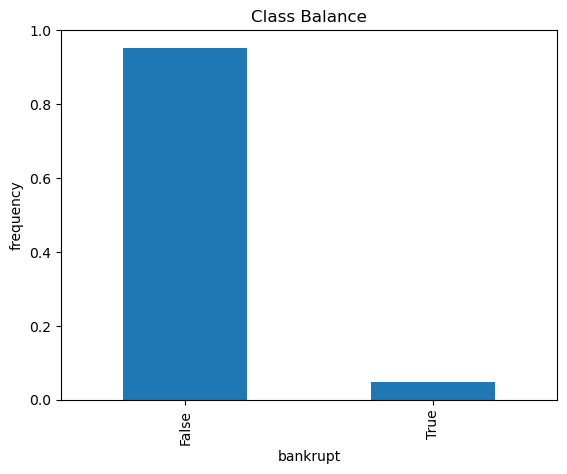

In [19]:
df["bankrupt"].value_counts(normalize=True).plot(
    kind="bar",
    xlabel="bankrupt",
    ylabel="frequency",
    title="Class Balance"
);

 That's good news for Poland's economy most of the companies in  dataset are doing all right for themselves,and  have an imbalanced dataset, where majority class is far bigger than  minority class.

make a boxplot to see how the values in "feat_27"=profit on operating activities / financial expenses  are distributed.

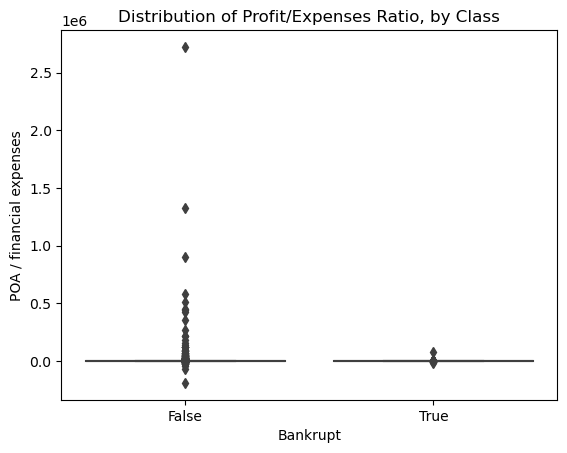

In [20]:
# Create boxplot
sns.boxplot(x="bankrupt",y="feat_27",data=df)
plt.xlabel("Bankrupt")
plt.ylabel("POA / financial expenses")
plt.title("Distribution of Profit/Expenses Ratio, by Class");

In [21]:
# Summary statistics for 'feat_27'
df["feat_27"].describe().apply("{0:,.0f}".format)

count        9,787
mean         1,186
std         34,693
min       -190,130
25%              0
50%              1
75%              5
max      2,723,000
Name: feat_27, dtype: object

Note that the median is around 1, but the mean is over 1000. That suggests that this feature is skewed to the right.  so Let's make a histogram to see what the distribution actually looks like.

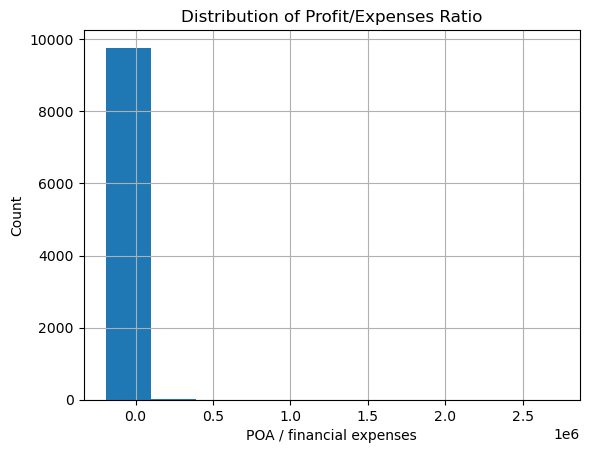

In [22]:
# Plot histogram of 'feat_27'
df["feat_27"].hist()
plt.xlabel("POA / financial expenses")
plt.ylabel("Count"),
plt.title("Distribution of Profit/Expenses Ratio");

The data is very skewed. So, in order to create a helpful boxplot, the data must need to trim .

In [23]:
q1 , q2 = df["feat_27"].quantile([0.1,0.9])
mask=df["feat_27"].between(q1,q2)

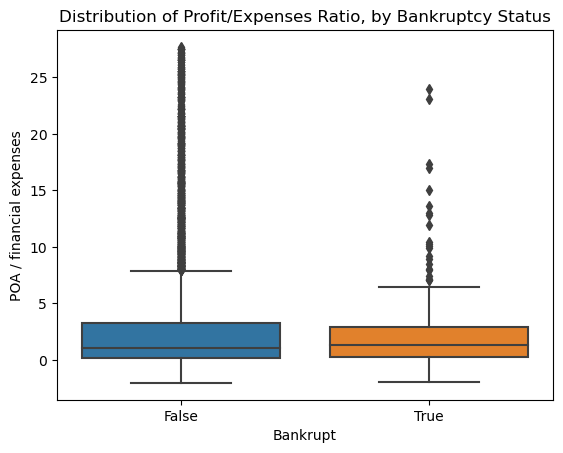

In [24]:
# Create clipped boxplot
q1 , q2 = df["feat_27"].quantile([0.1,0.9])
mask=df["feat_27"].between(q1,q2)
sns.boxplot(x="bankrupt",y="feat_27",data=df[mask])
plt.xlabel("Bankrupt")
plt.ylabel("POA / financial expenses")
plt.title("Distribution of Profit/Expenses Ratio, by Bankruptcy Status");

Repeat the exploration for "feat_27" on two other features in the dataset to see if they have the same  skewed distribution or not

In [25]:
# Explore another feature
df["feat_15"].describe().apply("{0:,.0f}".format)

count        10,494
mean          3,003
std         109,203
min      -2,321,800
25%             187
50%             806
75%           2,187
max      10,236,000
Name: feat_15, dtype: object

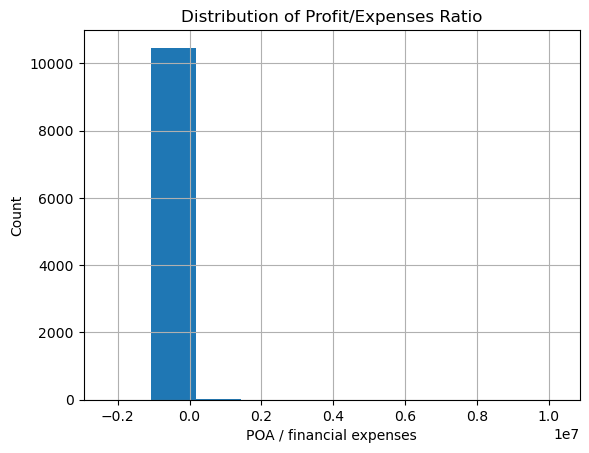

In [26]:
# Plot histogram of 'feat_15'
df["feat_15"].hist()
plt.xlabel("POA / financial expenses")
plt.ylabel("Count"),
plt.title("Distribution of Profit/Expenses Ratio");

In [27]:
# Explore another feature
df["feat_60"].describe().apply("{0:,.0f}".format)

count        9,910
mean           571
std         37,162
min              0
25%              6
50%             10
75%             21
max      3,660,200
Name: feat_60, dtype: object

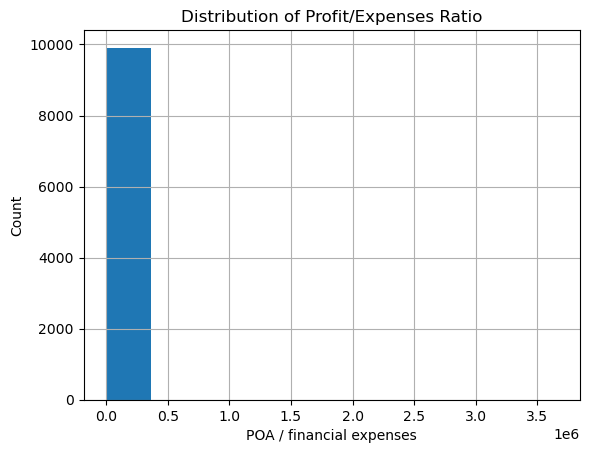

In [28]:
# Plot histogram of 'feat_15'
df["feat_60"].hist()
plt.xlabel("POA / financial expenses")
plt.ylabel("Count"),
plt.title("Distribution of Profit/Expenses Ratio");

they're skewed, too. This will be important to keep in mind when I decide what type of model I want to use.

another important consideration for model selection is whether there are any issues with multicollinearity in the model

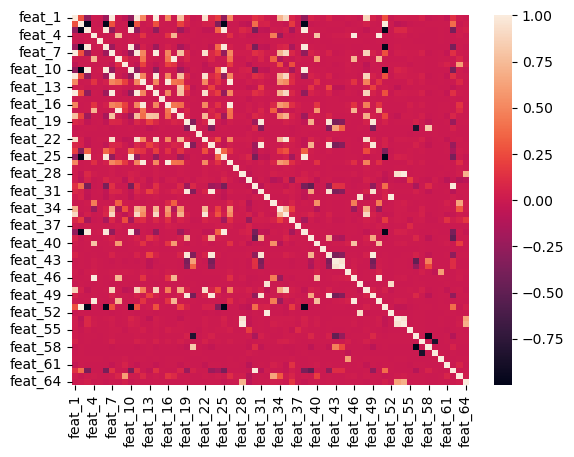

In [29]:
corr =df.drop(columns="bankrupt").corr()
sns.heatmap(corr);

# from EDA I think First, our data is imbalanced. This is something we need to address in our data preparation. Second, many of our features have missing values that we'll need to impute. And since the features are highly skewed, the best imputation strategy is likely median, not mean. Finally, we have autocorrelation issues, which means that we should steer clear of linear models, and try a tree-based model instead.

# Split

In [30]:
target = "bankrupt"
X =df.drop(columns=target)
y =df[target]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (10502, 64)
y shape: (10502,)


Divide the data (X and y) into training and test sets using a randomized train-test split.

In [31]:
X_train, X_test, y_train, y_test =train_test_split(
    X,y,test_size=0.2,random_state=42
)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (8401, 64)
y_train shape: (8401,)
X_test shape: (2101, 64)
y_test shape: (2101,)


# Resample

I can address the class imbalance I saw during our EDA. One strategy is to resample the training data. 

In [32]:
under_sampler =RandomUnderSampler(random_state=42)
X_train_under, y_train_under =under_sampler.fit_resample(X_train,y_train)
print(X_train_under.shape)
X_train_under.head()

(776, 64)


,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64
0,-0.046186,0.82856,-0.003189,0.98376,-31.036,-0.107780,-0.046186,0.206910,1.1201,0.171440,...,-0.881,-0.107620,-0.26941,1.03840,0.0,10.9830,12.3210,63.965,5.7063,1.3882
1,-0.067285,0.96818,0.034200,1.03620,-12.879,-0.085973,-0.068118,0.032868,3.0064,0.031822,...,19.630,0.001544,-2.11440,1.02270,0.0,21.2550,4.3755,114.730,3.1813,144.7400
2,0.489200,0.12948,0.660240,6.09910,445.260,0.000000,0.489200,6.723200,2.4824,0.870520,...,1197.300,0.196370,0.56196,0.80601,0.0,30.8160,14.3070,19.038,19.1720,11.8050
3,0.180040,0.12182,0.836760,7.86900,108.120,0.000000,0.225840,7.209100,3.0126,0.878180,...,846.410,0.067960,0.20501,0.92556,0.0,NaN,12.4210,14.759,24.7300,72.7200
4,0.134360,0.19862,0.722900,4.63960,137.880,0.000000,0.170570,4.034800,1.3154,0.801380,...,1620.800,0.148340,0.16767,0.87244,0.0,5.0272,2.9463,55.111,6.6230,16.7620


In [33]:
y_train_under.value_counts(normalize=True)

False    0.5
True     0.5
Name: bankrupt, dtype: float64

And then  over-sample.

In [34]:
over_sampler =RandomOverSampler(random_state=42)
X_train_over, y_train_over =over_sampler.fit_resample(X_train,y_train)
print(X_train_over.shape)
X_train_over.head()

(16026, 64)


,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64
0,0.125190,0.21204,-0.043561,0.76704,-26.932,0.427400,0.155220,3.7142,1.1762,0.78757,...,-5127.20,0.149790,0.158960,0.85021,0.031808,68.9750,10.7120,63.477,5.7501,1.2553
1,0.151860,0.33255,0.162240,1.49510,-235.790,0.000000,0.151860,2.0071,2.1377,0.66745,...,510.24,0.067150,0.227530,0.96277,0.000000,9.1247,11.1640,55.948,6.5239,4.1908
2,0.014939,0.75205,-0.137180,0.70350,-86.458,0.000000,0.019940,0.3297,1.0772,0.24795,...,-1014.60,0.006676,0.060252,0.98573,0.000000,9.6894,11.6890,156.780,2.3281,1.5970
3,0.000000,0.19330,0.165590,1.96570,24.238,-0.006545,-0.006545,4.1734,1.2443,0.80670,...,13029.00,0.179170,0.000000,0.82534,0.005453,12.8300,6.6118,50.298,7.2567,1.8770
4,0.303560,0.34142,0.634200,2.96060,236.980,0.000000,0.303560,1.9290,1.1622,0.65858,...,1758.40,0.288120,0.460940,0.74396,0.027254,12.7640,1.3530,101.590,3.5928,27.4580


In [35]:
y_train_over.value_counts(normalize=True)

False    0.5
True     0.5
Name: bankrupt, dtype: float64

# Build Model

# Baseline

In [36]:
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 4))

Baseline Accuracy: 0.9538


Note here that, because  the classes are imbalanced, the baseline accuracy is very high.so should keep this in mind because, even if  trained model gets a high validation accuracy score, that doesn't mean it's actually good.

# Iterate

Create three identical models: model_reg, model_under and model_over. All of them should use a SimpleImputer followed by a DecisionTreeClassifier

In [37]:
# Fit on `X_train`, `y_train`
model_reg =make_pipeline(
    SimpleImputer(strategy="median"),DecisionTreeClassifier(random_state=42)
)
model_reg.fit(X_train,y_train)

# Fit on `X_train_under`, `y_train_under`
model_under =make_pipeline(
    SimpleImputer(strategy="median"),DecisionTreeClassifier(random_state=42)
)
model_under.fit(X_train_under, y_train_under)

# Fit on `X_train_over`, `y_train_over`
model_over =make_pipeline(
    SimpleImputer(strategy="median"),DecisionTreeClassifier(random_state=42)
)
model_over.fit(X_train_over,y_train_over)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

# Evaluate

 calculate training and test accuracy for your three models.

In [38]:
for m in [model_reg, model_under, model_over]:
    acc_train =m.score(X_train,y_train)
    acc_test =m.score(X_train,y_train)

    print("Training Accuracy:", round(acc_train, 4))
    print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 1.0
Test Accuracy: 1.0
Training Accuracy: 0.7061
Test Accuracy: 0.7061
Training Accuracy: 1.0
Test Accuracy: 1.0


"good" accuracy scores don't tell us much about the model's performance when dealing with imbalanced data. So instead of looking at what the model got right or wrong, let's see how its predictions differ for the two classes in the dataset.

Plot a confusion matrix that shows how your best model performs on your validation set.

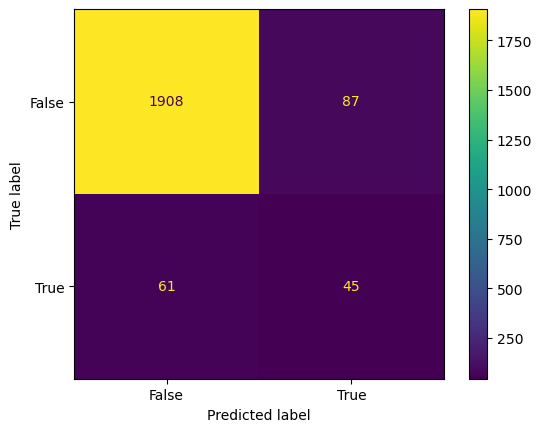

In [39]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(model_reg,X_test,y_test);

# Communicate

I have a reasonable model, let's graph the importance of each feature


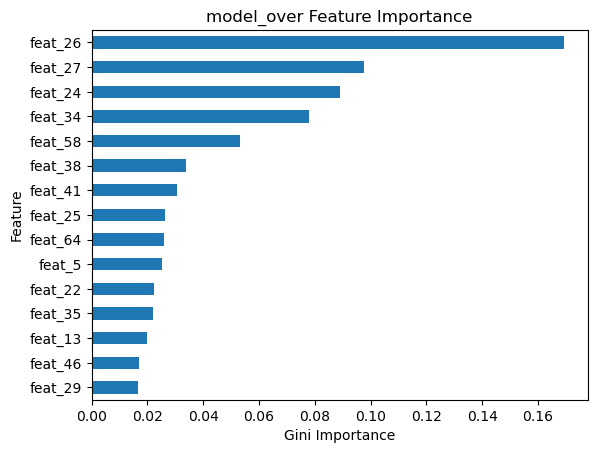

In [40]:
# Get importances
importances =model_over.named_steps["decisiontreeclassifier"].feature_importances_

# Put importances into a Series
feat_imp =pd.Series(importances,index=X_train_over.columns).sort_values()

# Plot series
feat_imp.tail(15).plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("model_over Feature Importance");

There's our old friend "feat_27" near the top, along with features 34 and 26. I think it is Good jop